In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
import sys
sys.path.append("/Users/megmillhouse/Desktop/UniMelb/Research/Viterbi/bridging_gaps/")
import viterbi_utils

In [142]:
from importlib import reload 
reload(viterbi_utils)

<module 'viterbi_utils' from '/Users/megmillhouse/Desktop/UniMelb/Research/Viterbi/bridging_gaps/viterbi_utils.py'>

In [143]:
ntimes = 200
nfreqs = 100
nempty = 100
ntimetotal = 2*ntimes+nempty

# Make transition matrix
A = viterbi_utils.construct_tridiag(1./3, nfreqs, nfreqs)
A[np.where(A==0)] = np.nan

# Errorgram is basically the width of the gaussian of the background noise
errorgram = np.ones((ntimetotal, nfreqs))

# Set excess power
excesspow = [0.0,0.0]

# Actually generate fake data
freqs = np.arange(0, 2*nfreqs, 2)

spec, total_path, path1, path2 = viterbi_utils.make_fake_gaps(ntimes,nfreqs,nempty,excesspow)

2


ValueError: could not broadcast input array from shape (200,100) into shape (200,)

<ipython-input-131-a1da0fdb2eac>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(ntimetotal)+0.5, freqs, spec.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)


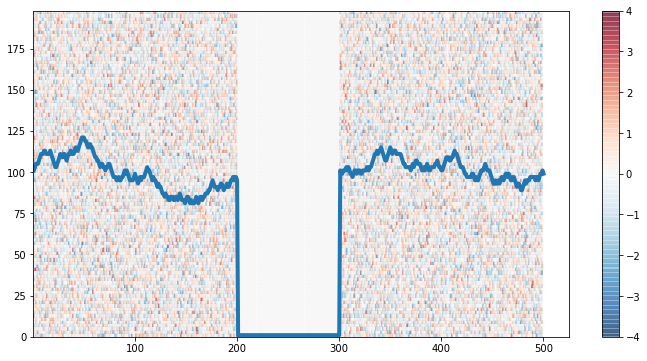

In [131]:
# plot, just to see
plt.figure(figsize=(12,6))
plt.pcolormesh(np.arange(ntimetotal)+0.5, freqs, spec.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)
plt.colorbar()
plt.plot(np.arange(ntimetotal)+1, 2*total_path+1, c='C0', lw=4, ls='-', label='True path')

In [132]:
# just assigning some defs
loglike = viterbi_utils.loglike
get_loglike_array = viterbi_utils.get_loglike_array

We got 0.00 percent of the first path correct
We got 3.00 percent of the second path correct
logL1 = -493.136
logL2 = -482.167
logLtot = -975.303
FAP = 0.36


<ipython-input-133-3ff9250c5c9b>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(2*ntimes+nempty)+0.5, freqs, spec.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)


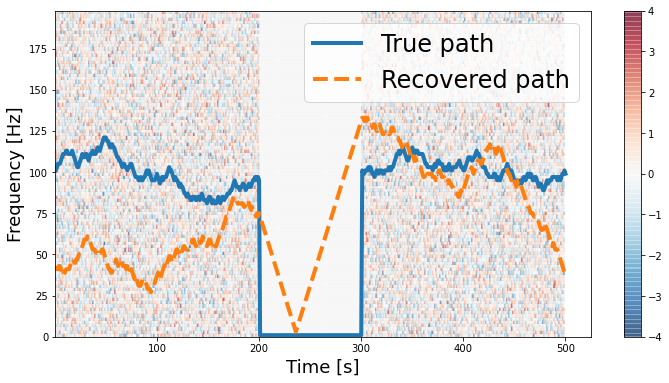

In [133]:
best_path, bpi, delta, PHI = viterbi_utils.viterbi2(spec, errorgram, freqs, A,\
                                                    llike=loglike, llike_array=get_loglike_array,\
                                                    ntimes=ntimetotal, nfreqs=nfreqs)


true_path = np.array([2 * p for p in total_path]) # why is this doubled? I'm confused.

# Calculate percet of path correct for the first and second halves of data
percent_correct_first = np.sum(true_path[0:ntimes]==best_path[0:ntimes])\
                               / float(np.size(best_path[0:ntimes]))
percent_correct_second = np.sum(true_path[ntimes+nempty:]==best_path[ntimes+nempty:])\
                                / float(np.size(best_path[ntimes+nempty:]))
print('We got %4.2f percent of the first path correct' % (100*percent_correct_first))
print('We got %4.2f percent of the second path correct' % (100*percent_correct_second))


# Calculate likelihoods
logL1, logL2, logLtot = viterbi_utils.loglike_path_gaps(spec,errorgram,bpi.astype(int),ntimes,nempty)
print("logL1 = %g\nlogL2 = %g\nlogLtot = %g" % (logL1,logL2,logLtot))

FAP = np.sum(logLtot < logLs)/len(logLs)
print("FAP = %g" % (1-FAP))

# Plot
plt.figure(figsize=(12,6))
plt.pcolormesh(np.arange(2*ntimes+nempty)+0.5, freqs, spec.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)
plt.colorbar()
plt.plot(np.arange(2*ntimes+nempty)+1, true_path+1, c='C0', lw=4, ls='-', label='True path')
plt.plot(np.arange(2*ntimes+nempty)+1, best_path+1, c='C1', lw=4, ls='--', alpha=1, label='Recovered path')
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.legend(fontsize=24, loc='best')
plt.show()

We got 44.50 percent of the path correct
logL1 = -565.088


<ipython-input-47-7854dc14db64>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(ntimes), freqs, spec1.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)


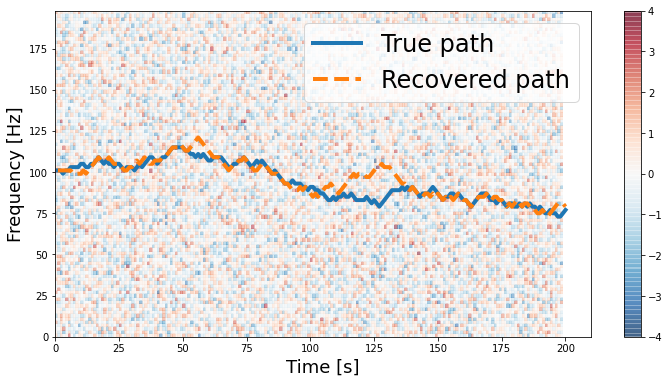

In [47]:
# Now to just the first half

spec1 = spec[0:ntimes]
egram = errorgram[0:ntimes]

best_path, bpi, delta, PHI = viterbi_utils.viterbi2(spec1, egram, freqs, A,\
                                                    llike=loglike, llike_array=get_loglike_array,\
                                                    ntimes=ntimes, nfreqs=nfreqs)


true_path = np.array([2 * p for p in path1]) # why is this doubled? I'm confused.

# Calculate percet of path correct for the first and second halves of data
percent_correct = np.sum(true_path ==best_path)\
                               / float(np.size(best_path))
print('We got %4.2f percent of the path correct' % (100*percent_correct))


# Calculate likelihoods
logL1 = viterbi_utils.loglike_2(spec1,egram,bpi.astype(int),ntimes)
print("logL1 = %g" % (logL1))

# Plot
plt.figure(figsize=(12,6))
plt.pcolormesh(np.arange(ntimes), freqs, spec1.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)
plt.colorbar()
plt.plot(np.arange(ntimes)+1, true_path+1, c='C0', lw=4, ls='-', label='True path')
plt.plot(np.arange(ntimes)+1, best_path+1, c='C1', lw=4, ls='--', alpha=1, label='Recovered path')
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.legend(fontsize=24, loc='best')
plt.show()

We got 27.00 percent of the path correct
logL1 = -491.708


<ipython-input-48-cded6ef43cdb>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.arange(ntimes), freqs, spec2.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)


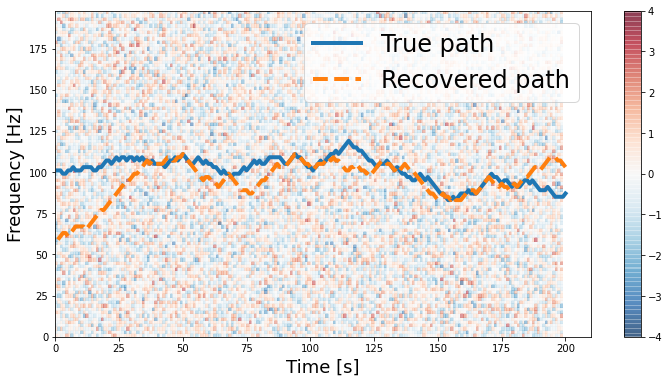

In [48]:
# Now to just the second half

spec2 = spec[ntimes+nempty:]
egram = errorgram[0:ntimes]

best_path, bpi, delta, PHI = viterbi_utils.viterbi2(spec2, egram, freqs, A,\
                                                    llike=loglike, llike_array=get_loglike_array,\
                                                    ntimes=ntimes, nfreqs=nfreqs)


true_path = np.array([2 * p for p in path2]) # why is this doubled? I'm confused.

# Calculate percet of path correct for the first and second halves of data
percent_correct = np.sum(true_path ==best_path)\
                               / float(np.size(best_path))
print('We got %4.2f percent of the path correct' % (100*percent_correct))


# Calculate likelihoods
logL1 = viterbi_utils.loglike_2(spec2,egram,bpi.astype(int),ntimes)
print("logL1 = %g" % (logL1))

# Plot
plt.figure(figsize=(12,6))
plt.pcolormesh(np.arange(ntimes), freqs, spec2.T, vmin=-4, vmax=4, cmap='RdBu_r', alpha=0.5)
plt.colorbar()
plt.plot(np.arange(ntimes)+1, true_path+1, c='C0', lw=4, ls='-', label='True path')
plt.plot(np.arange(ntimes)+1, best_path+1, c='C1', lw=4, ls='--', alpha=1, label='Recovered path')
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.legend(fontsize=24, loc='best')
plt.show()

--------
# Establish a background

In [88]:
ntimes = 200
nfreqs = 100
nempty = 0
ntimetotal = 2*ntimes+nempty

# Make transition matrix
A = viterbi_utils.construct_tridiag(1./3, nfreqs, nfreqs)
A[np.where(A==0)] = np.nan

# Errorgram is basically the width of the gaussian of the background noise
errorgram = np.ones((ntimetotal, nfreqs))

# Set excess power
excesspow = 0.0

# Actually generate fake data
freqs = np.arange(0, 2*nfreqs, 2)

logLs = []
for i in range(0,500):
    spec, total_path, path1, path2 = viterbi_utils.make_fake_gaps(ntimes,nfreqs,nempty,excesspow)

    best_path, bpi, delta, PHI = viterbi_utils.viterbi2(spec, errorgram, freqs, A,\
                                                        llike=loglike, llike_array=get_loglike_array,\
                                                        ntimes=ntimetotal, nfreqs=nfreqs)

    # Calculate likelihoods
    logL1, logL2, logLtot = viterbi_utils.loglike_path_gaps(spec,errorgram,bpi.astype(int),ntimes,nempty)
    logLs.append(logLtot)

In [102]:
logLs = np.array(logLs)

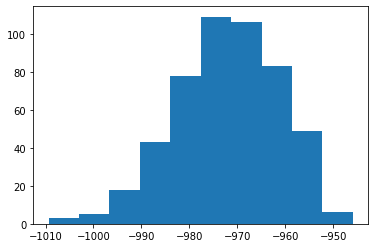

In [92]:
plt.hist(logLs);

In [93]:
ntimes = 100
nfreqs = 100
nempty = 0
ntimetotal = 2*ntimes+nempty

# Make transition matrix
A = viterbi_utils.construct_tridiag(1./3, nfreqs, nfreqs)
A[np.where(A==0)] = np.nan

# Errorgram is basically the width of the gaussian of the background noise
errorgram = np.ones((ntimetotal, nfreqs))

# Set excess power
excesspow = 0.0

# Actually generate fake data
freqs = np.arange(0, 2*nfreqs, 2)

logLs_half = []
for i in range(0,500):
    spec, total_path, path1, path2 = viterbi_utils.make_fake_gaps(ntimes,nfreqs,nempty,excesspow)

    best_path, bpi, delta, PHI = viterbi_utils.viterbi2(spec, errorgram, freqs, A,\
                                                        llike=loglike, llike_array=get_loglike_array,\
                                                        ntimes=ntimetotal, nfreqs=nfreqs)

    # Calculate likelihoods
    logL1, logL2, logLtot = viterbi_utils.loglike_path_gaps(spec,errorgram,bpi.astype(int),ntimes,nempty)
    logLs_half.append(logLtot)

In [96]:
logLs_half = np.array(logLs_half)

(array([  2.,   9.,  20.,  43.,  94., 111.,  97.,  93.,  25.,   6.]),
 array([-512.25579437, -508.0186233 , -503.78145222, -499.54428115,
        -495.30711008, -491.06993901, -486.83276794, -482.59559686,
        -478.35842579, -474.12125472, -469.88408365]),
 <BarContainer object of 10 artists>)

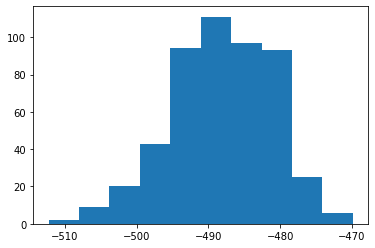

In [94]:
plt.hist(logLs_half)

In [101]:
test = -280

np.sum(test > logLs_half)/len(logLs_half)

1.0

In [155]:
def make_fake_data(ntimes, nfreqs, path, expower):
    # generate spectrogram
    specgram = np.random.randn(ntimes, nfreqs) # generate "background" as draws from normal dist
    errorgram = np.ones((ntimes, nfreqs)) # sigma=1
    freqs = np.arange(0, 2*nfreqs, 2)
        
    for ii in range(ntimes):
        # make path! Just add excess power to path
        specgram[ii, path[ii]] += expower
    return(specgram)

def make_fake_gaps(ntimes,nfreqs,nempty,excessPower):
    """
    Make fake data with a gap in the middle (current version has equal length data on either side)
    """
    
    try:
        exp1 = excessPower[0]
        exp2 = excessPower[1]
    except:
        exp1 = excessPower
        exp2 = excessPower
    
    freqs = np.arange(0, 2*nfreqs, 2)
    path_combined = [int(nfreqs/2)] # this just starts the path in the middle of the frequency space
    for ii in range(0,2*ntimes+nempty):
        # move -1,0,+1, and I think this accounts for the edges?
        path_combined.append(np.max([np.min([path_combined[ii-1] + np.random.randint(-1,2), nfreqs-1]), 0]))
    
    path1 = path_combined[0:ntimes]
    path2 = path_combined[ntimes+nempty:]
        
    specgram1 = make_fake_data(ntimes,nfreqs,path1,exp1)
    specgram2 = make_fake_data(ntimes,nfreqs,path2,exp2)
    
#     return(specgram1)
    
#     print(len(specgram1))

    empty = np.zeros((nempty,nfreqs))
    intermediate = np.append(specgram1,empty,axis=0)
    combined = np.append(intermediate,specgram2,axis=0)
    
    return(combined,path_combined,path1,path2)


In [156]:
ntimes = 200
nfreqs = 100
nempty = 100
ntimetotal = 2*ntimes+nempty

# Make transition matrix
A = viterbi_utils.construct_tridiag(1./3, nfreqs, nfreqs)
A[np.where(A==0)] = np.nan

# Errorgram is basically the width of the gaussian of the background noise
errorgram = np.ones((ntimetotal, nfreqs))

# Set excess power
excesspow = [0.0,0.0]

# Actually generate fake data
freqs = np.arange(0, 2*nfreqs, 2)

spec, total_path, path1, path2 = make_fake_gaps(ntimes,nfreqs,nempty,excesspow)

In [152]:
s[1]

[50,
 50,
 50,
 50,
 50,
 49,
 51,
 50,
 51,
 49,
 52,
 50,
 51,
 51,
 52,
 52,
 52,
 52,
 51,
 51,
 52,
 51,
 51,
 51,
 52,
 50,
 52,
 49,
 53,
 48,
 53,
 47,
 52,
 48,
 53,
 49,
 53,
 50,
 52,
 49,
 51,
 48,
 50,
 48,
 49,
 49,
 48,
 48,
 49,
 48,
 49,
 47,
 48,
 48,
 48,
 48,
 48,
 47,
 47,
 46,
 48,
 45,
 47,
 44,
 47,
 43,
 48,
 43,
 47,
 43,
 46,
 43,
 47,
 42,
 46,
 42,
 46,
 41,
 46,
 40,
 46,
 39,
 47,
 40,
 47,
 41,
 48,
 40,
 49,
 40,
 49,
 40,
 48,
 39,
 47,
 38,
 46,
 39,
 47,
 39,
 46,
 40,
 46,
 40,
 46,
 39,
 46,
 39,
 46,
 39,
 46,
 39,
 45,
 40,
 46,
 40,
 47,
 39,
 47,
 38,
 47,
 39,
 48,
 39,
 48,
 39,
 49,
 39,
 49,
 38,
 48,
 37,
 47,
 37,
 48,
 36,
 48,
 37,
 47,
 36,
 47,
 36,
 47,
 37,
 48,
 38,
 47,
 39,
 46,
 39,
 45,
 40,
 46,
 40,
 47,
 39,
 48,
 39,
 47,
 39,
 46,
 39,
 47,
 39,
 47,
 38,
 48,
 39,
 49,
 38,
 49,
 38,
 49,
 39,
 48,
 38,
 48,
 37,
 47,
 37,
 47,
 36,
 46,
 36,
 46,
 35,
 46,
 36,
 47,
 36,
 47,
 37,
 46,
 36,
 47,
 36,
 48,
 37,
 49,
 36]